In [1]:
import pandas as pd
import os
import numpy as np

In [27]:
data = pd.read_csv('./results/seuils.csv', skipinitialspace=True)

data.head()

,filename,numbers,seuil,timeQuickSeuil,timeQuickRdmSeuil
0,./exemplaires/testset_1000_0.txt,1000,0,2.154420,1.619120
1,./exemplaires/testset_1000_0.txt,1000,2,0.803508,0.764442
2,./exemplaires/testset_1000_0.txt,1000,4,0.535638,0.547973
3,./exemplaires/testset_1000_0.txt,1000,6,0.431586,0.485237
4,./exemplaires/testset_1000_0.txt,1000,8,0.405230,0.442648


In [28]:
data["numbers"].unique()

array([  1000,   5000,  10000,  50000, 100000, 500000])

In [29]:
weirdEntries = data.loc[data["numbers"] < 1000, :]
weirdEntries["filename"].unique()

array([], dtype=object)

In [30]:
# time seuil=0
defaultTimesVar = data["seuil"] == 0
defaultTimes = data[defaultTimesVar]
defaultTimes = defaultTimes.loc[:, ["filename", "timeQuickSeuil", "timeQuickRdmSeuil"]]
defaultTimes

,filename,timeQuickSeuil,timeQuickRdmSeuil
0,./exemplaires/testset_1000_0.txt,2.154420,1.619120
15,./exemplaires/testset_1000_1.txt,0.446018,0.460957
30,./exemplaires/testset_1000_2.txt,0.550731,0.440222
45,./exemplaires/testset_1000_3.txt,0.407564,0.512696
60,./exemplaires/testset_1000_4.txt,0.391593,0.457183
75,./exemplaires/testset_1000_5.txt,0.506964,0.422207
90,./exemplaires/testset_1000_6.txt,0.425907,0.422281
105,./exemplaires/testset_1000_7.txt,0.420119,0.436512
120,./exemplaires/testset_1000_8.txt,0.484035,0.473136
135,./exemplaires/testset_1000_9.txt,0.395712,0.410292


In [31]:
#getting a default time
#print (defaultTimes.loc[defaultTimes["filename"] == "./exemplaires/testset_1000_1.txt","timeQuickSeuil"])
def getDefaultTime(filename):
    return defaultTimes.loc[defaultTimes["filename"] == filename,"timeQuickSeuil"].values[0]

def getDefaultTimeRdm(filename):
    return defaultTimes.loc[defaultTimes["filename"] == filename,"timeQuickRdmSeuil"].values[0]

time = getDefaultTime("./exemplaires/testset_1000_0.txt")
print(time)
time = getDefaultTimeRdm("./exemplaires/testset_1000_0.txt")
print(time)

2.15442
1.6191200000000001


In [32]:
#Have the ratio (gain) column added
def addRatio(x):
    time = getDefaultTime(x["filename"])
    ratio = time/x["timeQuickSeuil"]
    return ratio
def addRatioRdm(x):
    time = getDefaultTimeRdm(x["filename"])
    ratio = time/x["timeQuickRdmSeuil"]
    return ratio
    
data["gain"] = data.apply(addRatio, axis=1)
#data["gain"] = defaultTimes.loc[((data["seuil"] == 0) and (data["filename"])) == data["filename"],"timeQuickSeuil"]/data["timeQuickSeuil"]
data["gainRdm"] = data.apply(addRatioRdm, axis=1)
data.head()

,filename,numbers,seuil,timeQuickSeuil,timeQuickRdmSeuil,gain,gainRdm
0,./exemplaires/testset_1000_0.txt,1000,0,2.154420,1.619120,1.000000,1.000000
1,./exemplaires/testset_1000_0.txt,1000,2,0.803508,0.764442,2.681268,2.118042
2,./exemplaires/testset_1000_0.txt,1000,4,0.535638,0.547973,4.022157,2.954744
3,./exemplaires/testset_1000_0.txt,1000,6,0.431586,0.485237,4.991867,3.336761
4,./exemplaires/testset_1000_0.txt,1000,8,0.405230,0.442648,5.316536,3.657805


In [33]:
means = data.groupby('seuil').mean()
means = means.loc[:,["gain", "gainRdm"]]
means

,gain,gainRdm
seuil,,
0,1.000000,1.000000
2,1.050261,1.008887
4,1.059946,1.014743
6,1.059484,1.017056
8,1.040115,1.018373
10,1.022992,1.014143
12,1.001669,1.016482
14,0.982264,1.020605
16,0.966549,1.019312


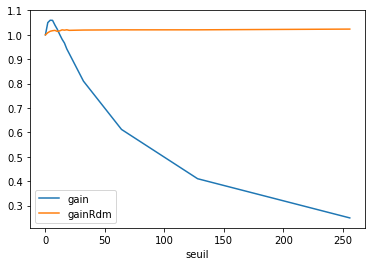

In [34]:
means.plot()


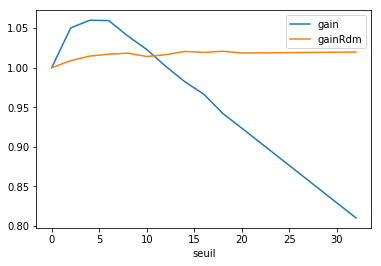

In [35]:
means[:12].plot()

In [44]:
means[:12]

,gain,gainRdm
seuil,,
0,1.000000,1.000000
2,1.023132,0.995256
4,1.021754,0.992186
6,1.014303,0.995347
8,1.003102,0.995052
10,0.990169,0.992523
12,0.973200,0.988037
14,0.957885,0.993722
16,0.942400,0.995121


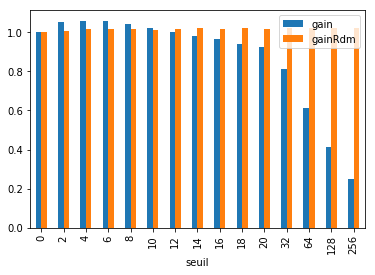

In [36]:
means.plot(kind='bar')

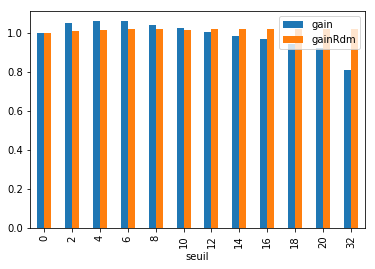

In [37]:
means[:12].plot(kind='bar')

In [39]:
meansByN = data.groupby('numbers').mean()
#meansByN = means.loc[:,["timeQuickSeuil", "timeQuickRdmSeuil"]]
meansByN


,seuil,timeQuickSeuil,timeQuickRdmSeuil,gain,gainRdm
numbers,,,,,
1000,39.333333,1.448564,0.442841,0.986701,1.076348
5000,39.333333,6.324452,2.615807,0.841376,1.001278
10000,39.333333,13.254956,5.563421,0.838062,1.020738
50000,39.333333,75.462000,32.791426,0.864064,1.013096
100000,39.333333,148.139512,69.457715,0.860900,0.996486
500000,39.333333,954.416751,392.520853,0.861708,0.993539


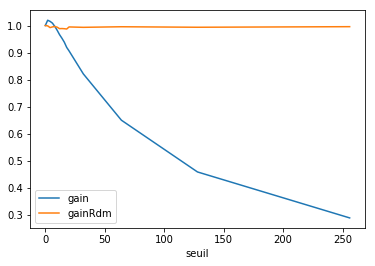

In [57]:
#def getMeanOfGain(taille, seuil):
#    
#    return 
#
#def addGain(x, seuil):
#    return x.numbers
#
#seuils = data.seuil.unique()
#for seuil in seuils:
#    meansByN["gainS=" + str(seuil)] = meansByN.apply(addGain, args=[seuil], axis=1)
#
#meansByN

seuilLargeSets = data.loc[data["numbers"] == 500000]
means = seuilLargeSets.groupby('seuil').mean()
means = means.loc[:,["gain", "gainRdm"]]
means.plot()

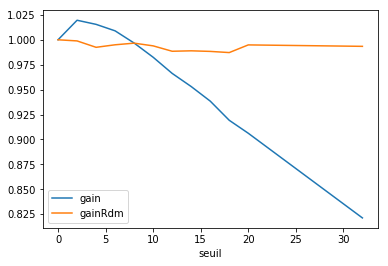

In [58]:
means[:12].plot()

Séparation par séries

In [62]:
data.head()

,filename,numbers,seuil,timeQuickSeuil,timeQuickRdmSeuil,gain,gainRdm
0,./exemplaires/testset_1000_0.txt,1000,0,2.154420,1.619120,1.000000,1.000000
1,./exemplaires/testset_1000_0.txt,1000,2,0.803508,0.764442,2.681268,2.118042
2,./exemplaires/testset_1000_0.txt,1000,4,0.535638,0.547973,4.022157,2.954744
3,./exemplaires/testset_1000_0.txt,1000,6,0.431586,0.485237,4.991867,3.336761
4,./exemplaires/testset_1000_0.txt,1000,8,0.405230,0.442648,5.316536,3.657805


In [79]:
import re

def getSerie(x):
    p = re.compile(".*_([^.]*)")
    g = p.match(x["filename"])
    numero = g.group(1)
    if len(numero) == 1:
        return "0"
    return numero[0]

dataS = data
dataS["serie"] = dataS.apply(getSerie, axis=1)
dataS.head()

,filename,numbers,seuil,timeQuickSeuil,timeQuickRdmSeuil,gain,gainRdm,serie
0,./exemplaires/testset_1000_0.txt,1000,0,2.154420,1.619120,1.000000,1.000000,0
1,./exemplaires/testset_1000_0.txt,1000,2,0.803508,0.764442,2.681268,2.118042,0
2,./exemplaires/testset_1000_0.txt,1000,4,0.535638,0.547973,4.022157,2.954744,0
3,./exemplaires/testset_1000_0.txt,1000,6,0.431586,0.485237,4.991867,3.336761,0
4,./exemplaires/testset_1000_0.txt,1000,8,0.405230,0.442648,5.316536,3.657805,0


In [81]:

dataS0 = dataS.loc[dataS["serie"] == "0"]
dataS1 = dataS.loc[dataS["serie"] == "1"]
dataS2 = dataS.loc[dataS["serie"] == "2"]

In [82]:
dataS0.groupby('seuil').mean()

,numbers,timeQuickSeuil,timeQuickRdmSeuil,gain,gainRdm
seuil,,,,,
0,111000,83.924178,85.923175,1.000000,1.000000
2,111000,81.589492,85.240960,1.086984,1.023874
4,111000,81.485236,86.921911,1.116729,1.037537
6,111000,82.096067,85.829976,1.131993,1.045864
8,111000,82.888310,85.755543,1.110391,1.048433
10,111000,84.679139,86.273168,1.080090,1.043883
12,111000,86.255340,86.510000,1.057622,1.048390
14,111000,87.556477,85.630731,1.034315,1.058980
16,111000,89.331151,85.727767,1.007348,1.055380


In [83]:
dataS1.groupby('seuil').mean()

,numbers,timeQuickSeuil,timeQuickRdmSeuil,gain,gainRdm
seuil,,,,,
0,111000,80.930142,85.561805,1.000000,1.000000
2,111000,78.929565,86.066120,1.045946,1.000540
4,111000,78.910796,85.871447,1.047362,1.005696
6,111000,79.909510,85.606358,1.033777,1.010519
8,111000,81.634885,86.452200,1.012950,1.009830
10,111000,83.082449,86.098905,0.988914,1.002943
12,111000,85.160126,86.412874,0.956471,1.003993
14,111000,87.054413,86.765143,0.926330,1.007246
16,111000,88.977812,86.612855,0.913684,1.008193


In [84]:
dataS2.groupby('seuil').mean()

,numbers,timeQuickSeuil,timeQuickRdmSeuil,gain,gainRdm
seuil,,,,,
0,111000,313.469237,79.020926,1.000000,1.000000
2,111000,311.051900,79.490772,1.017851,1.002245
4,111000,312.644586,79.406338,1.015747,1.000996
6,111000,313.230714,79.980664,1.012680,0.994785
8,111000,314.232636,78.965773,0.997005,0.996857
10,111000,315.142128,79.385740,0.999971,0.995603
12,111000,317.198111,79.963424,0.990915,0.997062
14,111000,318.733237,80.121761,0.986147,0.995588
16,111000,320.568106,80.159338,0.978615,0.994364
